In [45]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
import seaborn as sns


In [46]:
df = pd.read_csv("table1.csv", sep="\t")

In [47]:
df.columns = ["Journal", "Title", "Authors", "Country", "Year", "Abstract"]

In [48]:
df.head(5)

,Journal,Title,Authors,Country,Year,Abstract
0,International journal of systematic and evolut...,"Reichenbachiella versicolor sp. nov., isolated...",['Shi Ming-Jing' 'Wang Chong' 'Liu Zuan-Yan' '...,china,2018,"A Gram-stain-negative, strictly aerobic, non-f..."
1,International journal of systematic and evolut...,"Lactobacillus paragasseri sp. nov., a sister t...",['Tanizawa Yasuhiro' 'Tada Ipputa' 'Kobayashi ...,japan,2018,"Three strains, JCM 5343(T), JCM 5344 and JCM 1..."
2,International journal of systematic and evolut...,"Geobacillus yumthangensis sp. nov., a thermoph...",['Najar Ishfaq Nabi' 'Sherpa Mingma Thundu' 'D...,india,2018,"A thermophilic, spore-forming, rod-shaped bact..."
3,International journal of systematic and evolut...,"Chryseolinea flava sp. nov., a new species of ...",['Wang Jing-Jing' 'Chen Qi' 'Li Yue-Zhong'],china,2018,"A pale yellow bacterial strain, designated SDU..."
4,International journal of systematic and evolut...,"Ottowia konkukae sp. nov., isolated from rotte...",['Yi Kwon Jung' 'Im Wan-Taek' 'Kim Dong-Woon' ...,south korea,2018,"A Gram-negative, aerobic, non-motile, non-spor..."


In [49]:
titles = pd.DataFrame(df[["Journal","Title","Country","Year"]])

In [50]:
titles.head(5)

,Journal,Title,Country,Year
0,International journal of systematic and evolut...,"Reichenbachiella versicolor sp. nov., isolated...",china,2018
1,International journal of systematic and evolut...,"Lactobacillus paragasseri sp. nov., a sister t...",japan,2018
2,International journal of systematic and evolut...,"Geobacillus yumthangensis sp. nov., a thermoph...",india,2018
3,International journal of systematic and evolut...,"Chryseolinea flava sp. nov., a new species of ...",china,2018
4,International journal of systematic and evolut...,"Ottowia konkukae sp. nov., isolated from rotte...",south korea,2018


# Extração das espécies

In [51]:
nltk.download('stopwords')
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))

titles["no_punct"] = '|'.join(titles["Title"].tolist()).translate(transtab).split('|')

In [53]:
titles.head(5)

,Journal,Title,Country,Year,no_punct
0,International journal of systematic and evolut...,"Reichenbachiella versicolor sp. nov., isolated...",china,2018,Reichenbachiella versicolor sp nov isolated fr...
1,International journal of systematic and evolut...,"Lactobacillus paragasseri sp. nov., a sister t...",japan,2018,Lactobacillus paragasseri sp nov a sister taxo...
2,International journal of systematic and evolut...,"Geobacillus yumthangensis sp. nov., a thermoph...",india,2018,Geobacillus yumthangensis sp nov a thermophili...
3,International journal of systematic and evolut...,"Chryseolinea flava sp. nov., a new species of ...",china,2018,Chryseolinea flava sp nov a new species of Chr...
4,International journal of systematic and evolut...,"Ottowia konkukae sp. nov., isolated from rotte...",south korea,2018,Ottowia konkukae sp nov isolated from rotten b...


In [54]:
#remove stops e deixa em "lowercase"
stop = stopwords.words('english')
titles['nostop'] = titles['no_punct'].str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in stop))
titles.head()

,Journal,Title,Country,Year,no_punct,nostop
0,International journal of systematic and evolut...,"Reichenbachiella versicolor sp. nov., isolated...",china,2018,Reichenbachiella versicolor sp nov isolated fr...,reichenbachiella versicolor sp nov isolated re...
1,International journal of systematic and evolut...,"Lactobacillus paragasseri sp. nov., a sister t...",japan,2018,Lactobacillus paragasseri sp nov a sister taxo...,lactobacillus paragasseri sp nov sister taxon ...
2,International journal of systematic and evolut...,"Geobacillus yumthangensis sp. nov., a thermoph...",india,2018,Geobacillus yumthangensis sp nov a thermophili...,geobacillus yumthangensis sp nov thermophilic ...
3,International journal of systematic and evolut...,"Chryseolinea flava sp. nov., a new species of ...",china,2018,Chryseolinea flava sp nov a new species of Chr...,chryseolinea flava sp nov new species chryseol...
4,International journal of systematic and evolut...,"Ottowia konkukae sp. nov., isolated from rotte...",south korea,2018,Ottowia konkukae sp nov isolated from rotten b...,ottowia konkukae sp nov isolated rotten biji t...


In [55]:
titles["no_genus"] = titles["nostop"].apply(lambda x: x.replace("gen nov ", "")).apply(lambda x: x.replace("gen et ", "")).apply(lambda x: x.replace("nbsp", ""))

In [56]:
#captura espécies
import re

titles["species"] = titles["no_genus"].str.findall('\w+ \w+ (?:sp nov|spnov)|\w+ (?:sp nov|spnov)') #tenta primeiro duas palavras antes do padrão, depois uma

titles.to_csv("species.txt") #Ficou ótimo, só teve problema as espécies com nome errado no banco de dados

In [57]:
titles #posso verificar quais gêneros são mais isolados em cada país, por exemplo

,Journal,Title,Country,Year,no_punct,nostop,no_genus,species
0,International journal of systematic and evolut...,"Reichenbachiella versicolor sp. nov., isolated...",china,2018,Reichenbachiella versicolor sp nov isolated fr...,reichenbachiella versicolor sp nov isolated re...,reichenbachiella versicolor sp nov isolated re...,[reichenbachiella versicolor sp nov]
1,International journal of systematic and evolut...,"Lactobacillus paragasseri sp. nov., a sister t...",japan,2018,Lactobacillus paragasseri sp nov a sister taxo...,lactobacillus paragasseri sp nov sister taxon ...,lactobacillus paragasseri sp nov sister taxon ...,[lactobacillus paragasseri sp nov]
2,International journal of systematic and evolut...,"Geobacillus yumthangensis sp. nov., a thermoph...",india,2018,Geobacillus yumthangensis sp nov a thermophili...,geobacillus yumthangensis sp nov thermophilic ...,geobacillus yumthangensis sp nov thermophilic ...,[geobacillus yumthangensis sp nov]
3,International journal of systematic and evolut...,"Chryseolinea flava sp. nov., a new species of ...",china,2018,Chryseolinea flava sp nov a new species of Chr...,chryseolinea flava sp nov new species chryseol...,chryseolinea flava sp nov new species chryseol...,[chryseolinea flava sp nov]
4,International journal of systematic and evolut...,"Ottowia konkukae sp. nov., isolated from rotte...",south korea,2018,Ottowia konkukae sp nov isolated from rotten b...,ottowia konkukae sp nov isolated rotten biji t...,ottowia konkukae sp nov isolated rotten biji t...,[ottowia konkukae sp nov]
5,Systematic and applied microbiology,Caulobacter zeae sp. nov. and Caulobacter radi...,china,2018,Caulobacter zeae sp nov and Caulobacter radici...,caulobacter zeae sp nov caulobacter radicis sp...,caulobacter zeae sp nov caulobacter radicis sp...,"[caulobacter zeae sp nov, caulobacter radicis ..."
6,Systematic and applied microbiology,Physiological and genomic properties of Thermu...,china,2018,Physiological and genomic properties of Thermu...,physiological genomic properties thermus tenui...,physiological genomic properties thermus tenui...,[thermus tenuipuniceus sp nov]
7,International journal of systematic and evolut...,"Blastococcus litoris sp. nov., isolated from s...",south korea,2018,Blastococcus litoris sp nov isolated from sea-...,blastococcus litoris sp nov isolated sea-tidal...,blastococcus litoris sp nov isolated sea-tidal...,[blastococcus litoris sp nov]
8,International journal of systematic and evolut...,"Mycobacterium decipiens sp. nov., a new specie...",united states of america,2018,Mycobacterium decipiens sp nov a new species c...,mycobacterium decipiens sp nov new species clo...,mycobacterium decipiens sp nov new species clo...,[mycobacterium decipiens sp nov]
9,Applied and environmental microbiology,"Genome analysis, metabolic potential and preda...",united kingdom,2018,Genome analysis metabolic potential and predat...,genome analysis metabolic potential predatory ...,genome analysis metabolic potential predatory ...,[herpetosiphon llansteffanense sp nov]


In [58]:
#com esse código posso ver nomes de espécies que se repetem, são poucos, e ver quais gêneros são mais frequentes
from  itertools import chain
from collections import Counter

species = pd.Series(list(chain.from_iterable(titles["species"])))
freq_species = species.value_counts()
#freq_species.to_csv("freq_species.csv")


In [59]:
freq_species.head(5)

borrelia spielmanii sp nov            4
bizionia argentinensis sp nov         3
pseudoalteromonas phenolica sp nov    2
streptomyces gulbargensis sp nov      2
lactobacillus sobrius sp nov          2
dtype: int64

In [60]:
freq_species_df = pd.DataFrame(freq_species).reset_index()
freq_species_df.columns = ["nome", "frequency"]


In [61]:
freq_species_df["frequency"].sum()

10975

In [62]:
freq_species_df["genus"] = freq_species_df["nome"].str.split(" ").apply(lambda x: x[0])
freq_species_df

,nome,frequency,genus
0,borrelia spielmanii sp nov,4,borrelia
1,bizionia argentinensis sp nov,3,bizionia
2,pseudoalteromonas phenolica sp nov,2,pseudoalteromonas
3,streptomyces gulbargensis sp nov,2,streptomyces
4,lactobacillus sobrius sp nov,2,lactobacillus
5,haematospirillum jordaniae sp nov,2,haematospirillum
6,pelomonas puraquae sp nov,2,pelomonas
7,novosphingobium aquaticum sp nov,2,novosphingobium
8,caldicoprobacter algeriensis sp nov,2,caldicoprobacter
9,deinococcus soli sp nov,2,deinococcus


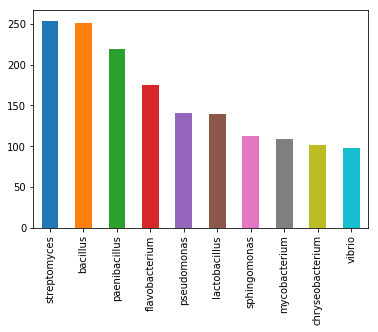

In [63]:
freq_species_df["genus"].value_counts().head(10).plot(kind="bar")

In [64]:
freq_species_df["genus"].value_counts().head(10).to_csv("generos.txt")

In [65]:
top_genera = pd.DataFrame(freq_species_df["genus"].value_counts().head(10)).reset_index()
top_genera

,index,genus
0,streptomyces,254
1,bacillus,251
2,paenibacillus,219
3,flavobacterium,175
4,pseudomonas,141
5,lactobacillus,140
6,sphingomonas,112
7,mycobacterium,109
8,chryseobacterium,101
9,vibrio,98


In [66]:
top_genera.columns = ["genus", "Frequency"]

In [67]:
top_genera

,genus,Frequency
0,streptomyces,254
1,bacillus,251
2,paenibacillus,219
3,flavobacterium,175
4,pseudomonas,141
5,lactobacillus,140
6,sphingomonas,112
7,mycobacterium,109
8,chryseobacterium,101
9,vibrio,98


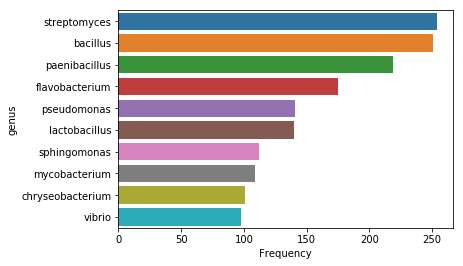

In [68]:
sns.barplot(x='Frequency', y='genus', data=top_genera)

# Correlacionar com Filos

In [69]:
filos = pd.read_csv("bac_lineages_uniq.csv")

In [70]:
filos.head(3)

,phylum,class,order,family,genus
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Alkaligence
2,NaN,NaN,NaN,NaN,Bactoderma


In [71]:
filos["genus"] = filos["genus"].apply(lambda x: str(x).lower())

In [72]:
filos.head(8)

,phylum,class,order,family,genus
0,NaN,NaN,NaN,NaN,nan
1,NaN,NaN,NaN,NaN,alkaligence
2,NaN,NaN,NaN,NaN,bactoderma
3,NaN,NaN,NaN,NaN,candidatus aegiribacteria
4,NaN,NaN,NaN,NaN,candidatus moduliflexus
5,NaN,NaN,NaN,NaN,candidatus ovobacter
6,NaN,Candidatus Sericytochromatia,NaN,NaN,nan
7,NaN,NaN,NaN,NaN,candidatus vecturithrix


In [73]:
genus_counts = pd.DataFrame(freq_species_df["genus"].value_counts()).reset_index()
genus_counts.columns = ["genus", "Frequency"]
genus_counts

,genus,Frequency
0,streptomyces,254
1,bacillus,251
2,paenibacillus,219
3,flavobacterium,175
4,pseudomonas,141
5,lactobacillus,140
6,sphingomonas,112
7,mycobacterium,109
8,chryseobacterium,101
9,vibrio,98


In [74]:
filo_genus = pd.merge(genus_counts, filos, on="genus")

In [75]:
filo_genus.head(10)

,genus,Frequency,phylum,class,order,family
0,streptomyces,254,Actinobacteria,Actinobacteria,Streptomycetales,Streptomycetaceae
1,bacillus,251,Firmicutes,Bacilli,Bacillales,Bacillaceae
2,paenibacillus,219,Firmicutes,Bacilli,Bacillales,Paenibacillaceae
3,flavobacterium,175,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae
4,pseudomonas,141,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae
5,lactobacillus,140,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae
6,sphingomonas,112,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae
7,mycobacterium,109,Actinobacteria,Actinobacteria,Corynebacteriales,Mycobacteriaceae
8,chryseobacterium,101,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae
9,vibrio,98,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae


In [76]:
filo_counts = pd.DataFrame(filo_genus.groupby("phylum")["Frequency"].sum())

In [77]:
filo_counts["Frequency"].sum()

10503

In [78]:
filo_counts.sort_values(by="Frequency", ascending=False)

,Frequency
phylum,
Proteobacteria,4229
Actinobacteria,2273
Firmicutes,1862
Bacteroidetes,1640
Deinococcus-Thermus,90
Spirochaetes,51
Verrucomicrobia,47
Acidobacteria,45
Chloroflexi,35


In [79]:
top_filo = filo_counts.sort_values(by="Frequency", ascending=False).head(5)

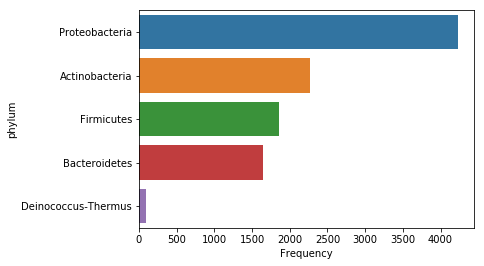

In [84]:
sns.barplot(x='Frequency', y=top_filo.index, data=top_filo)

# Verificar diferenças entre tabela dos filos e a tabela dos gêneros

In [ ]:
merged = genus_counts.merge(filos, on="genus", indicator=True, how="outer")
merged[merged['_merge'] == 'left_only']

'''
Não está bom. Aqui pode ser um checkpoint. Se ficar ruim, tem que filtrar antes de contar os gêneros e os filos (NOT archaeon).

Archaea:

*Halorubrum
*Methanobacterium
*Haloferax
*Thermococcus
*Archaeoglobus

Fungo:

*Candida
*Rhodotorula
*Cryptococcus
'''

# Wordclouds títulos

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from collections import Counter

titles = titles["Title"]
titles_cat = titles.str.cat(sep=" ")

punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))
titles_no_punct = titles_cat.translate(transtab)

stop_words = stopwords.words('english')
word_tokens = word_tokenize(titles_no_punct.lower()) 

words_no_stops = [] 
for w in word_tokens:
    if w not in stop_words:
        words_no_stops.append(w)